In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from itertools import combinations,chain,combinations_with_replacement,product,chain
from collections import Counter

from scipy.special import factorial

import seaborn as sns

import glob
import os

import pickle
from pprint import pprint
import re

In [2]:
from helpers import *

# Pre-process data + compute epistasis measures for each protein

For each protein we compute  dictionary `f_vals` where `key` is genotype, encoded as a list of ints and `value` is fitness.

(For keys: e.g. [0,1,0] means mutation 1 at locus 1, while [0,2,3] means mutation 2 at locus 1 and mutation 3 at locus 3)

Then we compute epistasis measures for all 3-tuples, 4-tuples, and 5-tuples of mutations. 
(Note that you may have multiple measures for the same set of loci, since you can have different mutations at each loci)

In [3]:
from collections import defaultdict

results_dict=defaultdict(dict) # key is epistasis order, value is dict:
                #     {key is dataset name, value is output of mult_and_chim_epistasis (see function for more details)

## GB1 protein

### Pre-processing

In [4]:
data_file='protein_data/GB1_four_mutations_full_data.csv'
df=pd.read_csv(data_file)

protein_list=['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P',
       'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
wt_variant='VDGV'

# i-th entry is ordered list of variants in position i where entry 0 is wild type
protein_list_pos=[{} for i in range(4)] 
for i in range(4):
    protein_list_pos_i={wt_variant[i]:0}
    c=1
    for p in protein_list:
        if p!=wt_variant[i]:
            protein_list_pos_i[p]=c
            c+=1
    protein_list_pos[i]=protein_list_pos_i
    
f_vals={} # e.g. maps (0,1,3,5) to fitness of (wildtype, protein 1, protein 3, protein 5)
var_list=df['Variants']
for ind,var in enumerate(var_list):
    var_index=np.array([-1 for i in range(4)])
    for i in range(4):
        var_index[i]=protein_list_pos[i][var[i]]
    f_vals[tuple(var_index)]=df['Fitness'][ind]

/tmp/ipykernel_86236/1677729178.py:2: DtypeWarning: Columns (8,10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(data_file)


### Compute epistasis

In [5]:
key='GB1'
for order in [3,4,5]:
    print(f'Computing epistasis for order {order}...')
    results_dict[order][key]=mult_and_chim_epistasis(f_vals, order, log=True, fitness_threshold=0.01)

Computing epistasis for order 3...
Computing epistasis for order 4...
Computing epistasis for order 5...


/n/fs/ragr-data/users/uchitra/miniconda3/envs/gaston-dev/lib/python3.11/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/n/fs/ragr-data/users/uchitra/miniconda3/envs/gaston-dev/lib/python3.11/site-packages/numpy/core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/n/fs/ragr-data/users/uchitra/miniconda3/envs/gaston-dev/lib/python3.11/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/n/fs/ragr-data/users/uchitra/miniconda3/envs/gaston-dev/lib/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/n/fs/ragr-data/users/uchitra/miniconda3/envs/gaston-dev/lib/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


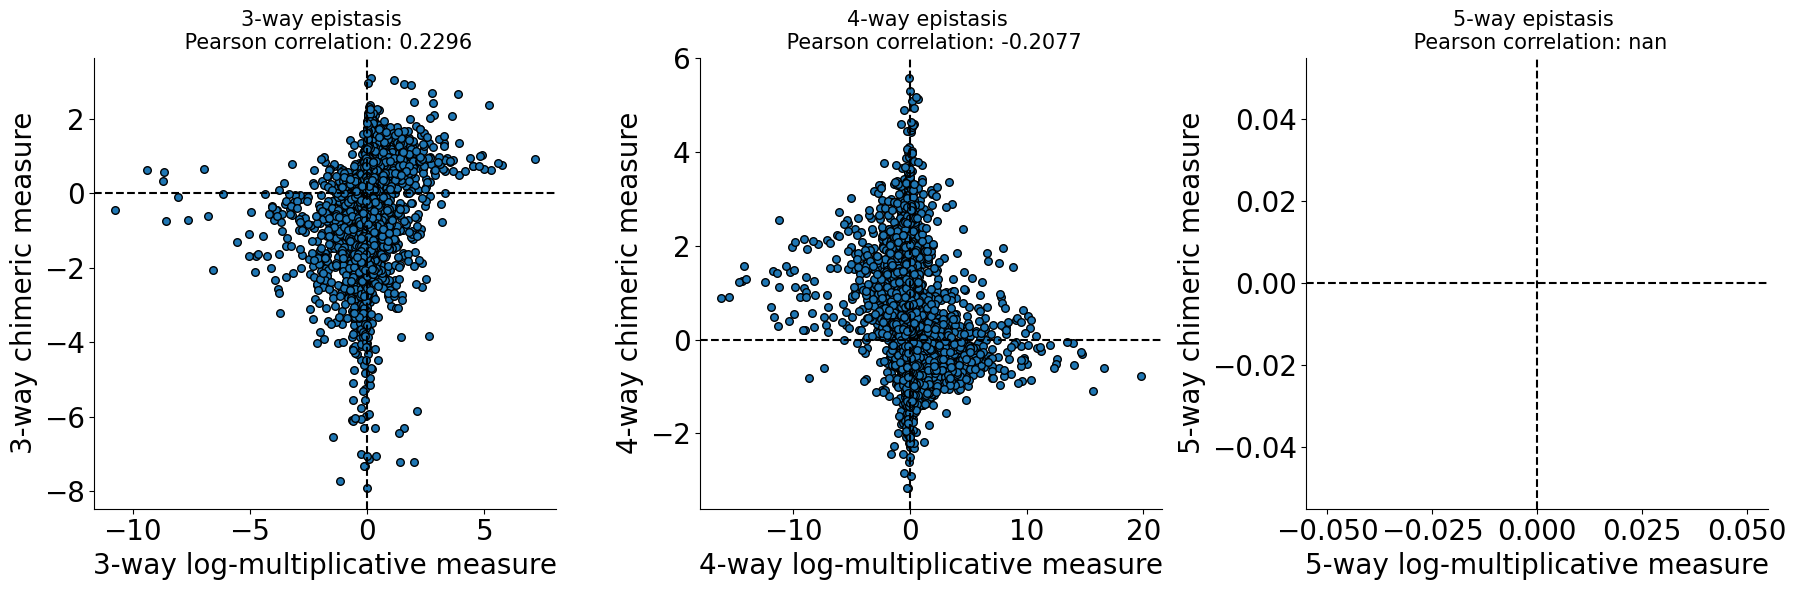

In [6]:
plot_mult_vs_chim(results_dict, 'GB1', order_list=[3,4,5])

## COVID spike protein

### Pre-processing

In [7]:
data_file='protein_data/COVID_spike_cleaned_Kds_RBD_ACE2.tsv'
df=pd.read_csv(data_file,sep='\t',dtype={'geno': str})

genotype_list=[list(i) for i in list(df['geno'])]
genotype_list=[[eval(i) for i in lis] for lis in genotype_list]

fitness_list=np.array(np.exp(df['log10Kd_a'] - df['log10Kd_a'][0]))

f_vals={tuple(genotype_list[i]):fitness_list[i] for i in range(len(fitness_list))}

### Compute epistasis measures

In [8]:
key='COVID_spike'
for order in [3,4,5]:
    print(f'Computing epistasis for order {order}...')
    results_dict[order][key]=mult_and_chim_epistasis(f_vals, order, log=True, fitness_threshold=0.01)

Computing epistasis for order 3...
Computing epistasis for order 4...
Computing epistasis for order 5...


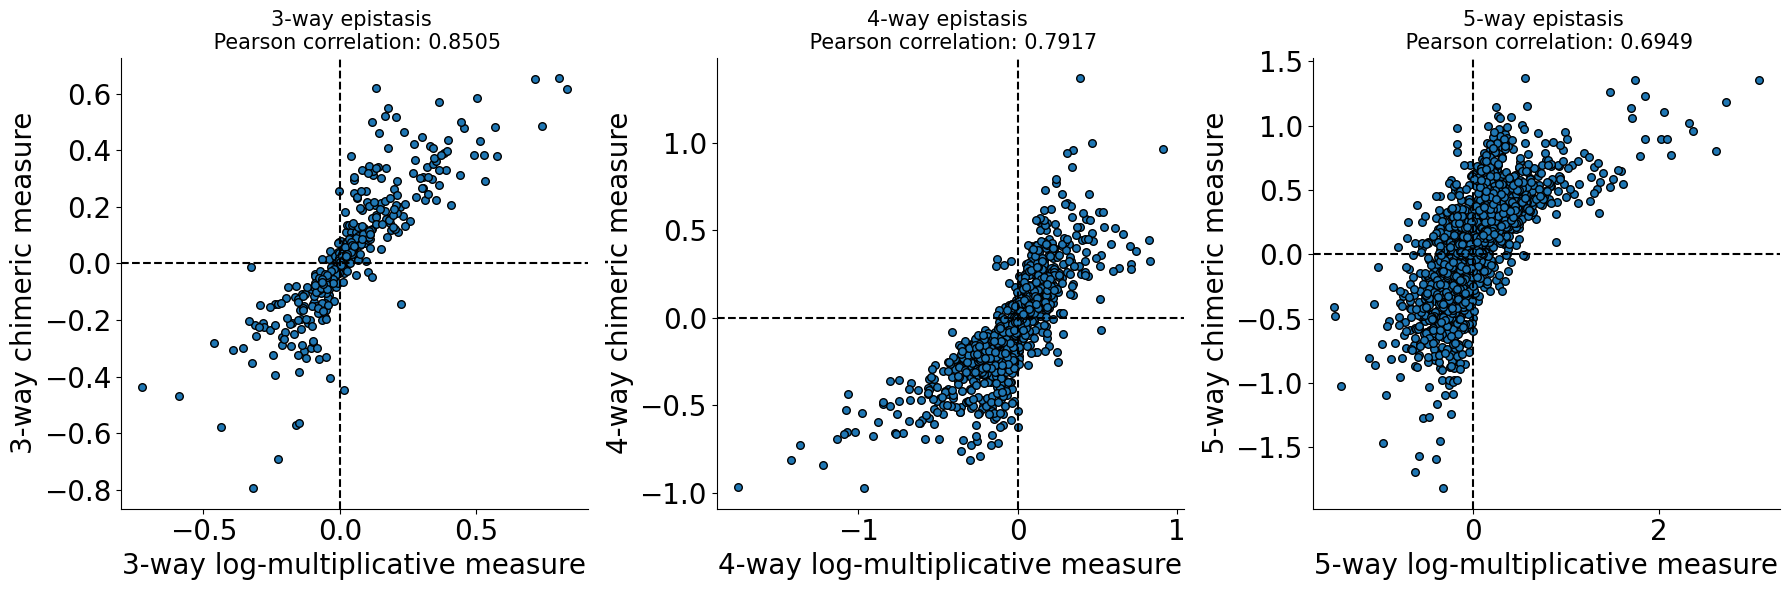

In [9]:
plot_mult_vs_chim(results_dict, 'COVID_spike', order_list=[3,4,5])

## folA protein (Papkou et al)

### Pre-processing

In [10]:
file='protein_data/folA_fitness_27DE.csv'
df=pd.read_csv(file)
fitness_dict={df.iloc[i]['nt_seq']: np.exp(df.iloc[i]['fitness']) for i in range(len(df))}

In [11]:
fitness_dict

{'AAAAAAA': 0.8175706150199449,
 'AAAAAAC': 1.086384038118129,
 'AAAAAAG': 0.7918411505263281,
 'AAAAAAT': 0.9971019373102902,
 'AAAAACA': 2.5997609806666686,
 'AAAAACC': 3.1878539854406585,
 'AAAAACG': 3.0545280992004806,
 'AAAAACT': 3.1516137173108754,
 'AAAAAGA': 1.226532636454045,
 'AAAAAGC': 2.6133965110738724,
 'AAAAAGG': 1.1607782883739952,
 'AAAAAGT': 2.423882332012578,
 'AAAAATA': 2.883154048768516,
 'AAAAATC': 2.8748213431169494,
 'AAAAATG': 3.7801370096373303,
 'AAAAATT': 2.77639713011737,
 'AAAACAA': 3.066510154295808,
 'AAAACAC': 1.8142927905265889,
 'AAAACAG': 2.6893527866691236,
 'AAAACAT': 1.6626831252946728,
 'AAAACCA': 0.6154755185025644,
 'AAAACCC': 0.6702861788809429,
 'AAAACCG': 0.6484041886948457,
 'AAAACCT': 0.6787090150205447,
 'AAAACGA': 1.2331988760775998,
 'AAAACGC': 1.3570035478564229,
 'AAAACGG': 1.1713017655178943,
 'AAAACGT': 1.2734566168015855,
 'AAAACTA': 3.190316504353627,
 'AAAACTC': 3.2471443025794398,
 'AAAACTG': 3.176403388175798,
 'AAAACTT': 3.301

In [12]:
# wild type
df[df['WT']==True]

,nt_seq,fitness,sigma,WT
9678,GCCTCTC,0.0,0.035609,True


In [13]:
wt='GCCTCTC' # the wildtype, from above

# Create a list of base mappings for each position
base_mappings = []
for i in range(len(wt)):
    base_mappings.append({wt[i]: 0, 'A': 1, 'C': 2, 'G': 3, 'T': 4})
    base_mappings[i].pop(wt[i])  # Remove the wild type base
    base_mappings[i] = {**{wt[i]: 0}, **base_mappings[i]}  # Reinsert it at position 0

# Function to convert a sequence to a tuple of mutations
def sequence_to_mutation_tuple(sequence, wt_sequence, base_mappings):
    return tuple(
        base_mappings[i][sequence[i]]
        for i in range(len(sequence))
    )

# Create the new dictionary
f_vals = {sequence_to_mutation_tuple(seq, wt, base_mappings): fitness for seq, fitness in fitness_dict.items()}

### Compute epistasis measures

In [14]:
key='folA'
for order in [3,4,5]:
    print(f'Computing epistasis for order {order}...')
    results_dict[order][key]=mult_and_chim_epistasis(f_vals, order, log=True, fitness_threshold=0.01)

Computing epistasis for order 3...
Computing epistasis for order 4...
Computing epistasis for order 5...


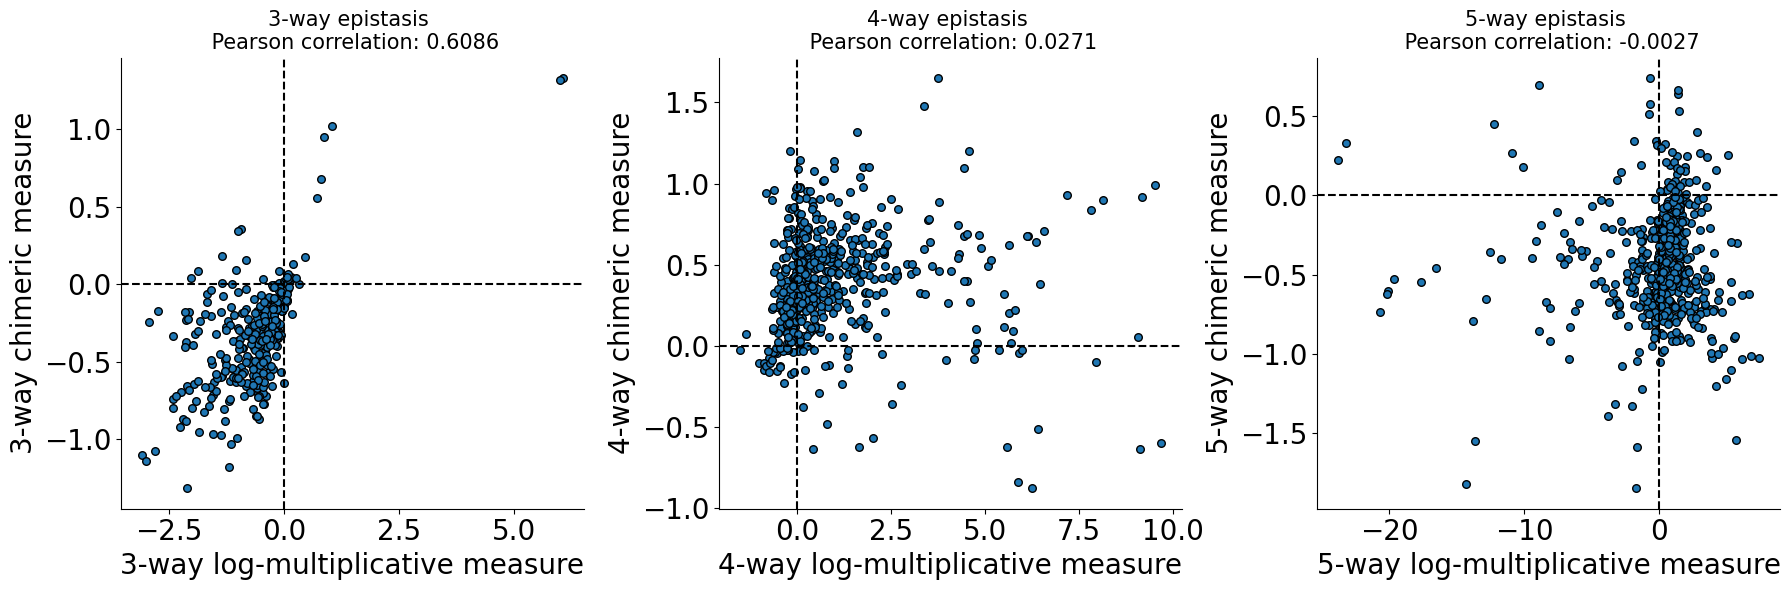

In [15]:
plot_mult_vs_chim(results_dict, 'folA', order_list=[3,4,5])

## CombiSEAL (SpCas9)
Data from https://github.com/AWHKU/RunMLDE_SpCas9/tree/main

### Pre-processing

In [16]:
file='protein_data/SpCas9_41592_2019_473_MOESM4_ESM_CombiSEAL_supp_Fig2.xlsx'
df=pd.read_excel(file)
# remove weird rows/columns
df=df.iloc[3:]
df.columns = df.iloc[0]
df = df[1:]
df.reset_index(drop=True, inplace=True)
df

/n/fs/ragr-data/users/uchitra/miniconda3/envs/gaston-dev/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


3,Cas9 variant #,661,695,848,923,924,926,1003,1060,RFPsg5 ON,RFPsg5 OFF5-2,RFPsg8 ON,RFPsg8 OFF5,Key
0,1,R,Q,K,E,T,Q,K,R,0.600845,1.091133,2.17568,1.711326,WT
1,2,R,A,K,E,T,Q,K,R,0.948725,-0.732846,0.927654,0.474042,NaN
2,3,A,Q,K,E,T,Q,K,R,1.116259,1.01469,1.06891,NaN,NaN
3,4,A,A,K,E,T,Q,K,R,0.757387,-0.0025,1.177008,0.069335,NaN
4,5,R,Q,A,E,T,Q,K,R,1.055004,-0.212083,1.02643,0.343941,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,948,A,A,K,M,R,A,H,A,0.196873,-0.854042,-0.343848,-0.259025,NaN
948,949,R,Q,A,M,R,A,H,A,-0.503288,0.124539,-0.341122,-0.051954,NaN
949,950,R,A,A,M,R,A,H,A,-0.672942,-0.027869,-0.025865,-0.790649,NaN
950,951,A,Q,A,M,R,A,H,A,-0.359404,-0.242196,-0.53349,NaN,NaN


In [17]:
wt='RQKETQKR' # wildtype sequence

# get all possible mutations at each index
sequence_cols=df.columns[1:9].to_numpy(dtype=int)
fitness_cols=list(df.columns[9:13])
possible_subs_per_ind=[list(np.unique( df[sequence_cols[i]].to_numpy() )) for i in range(8)]
print(possible_subs_per_ind) 

[['A', 'R'], ['A', 'Q'], ['A', 'K'], ['A', 'C', 'E', 'G', 'H', 'K', 'L', 'M', 'Q', 'R', 'V', 'W'], ['D', 'G', 'K', 'L', 'R', 'S', 'T', 'V', 'W'], ['A', 'E', 'P', 'Q'], ['A', 'H', 'K', 'R'], ['A', 'R']]


In [18]:
# create f_val that combines all four fitness measurements: RFPsg5 ON	RFPsg5 OFF5-2	RFPsg8 ON	RFPsg8 OFF5
# For each fitness measure, we create a "new"  genotype
# e.g. 'RQKETQKA' will be encoded as [0,0,0,0,0,0,0,1] for RFPsg5 ON and [0,0,0,0,0,0,0,100] for RFPsg5 OFF5-2
list(df.columns[1:9])

f_vals={}
for i in range(df.shape[0]):
    protein_seq=list(df.iloc[i][[661, 695, 848, 923, 924, 926, 1003, 1060]])
    genotype=np.zeros(len(protein_seq)).astype(int)
    for j in range(len(protein_seq)):
        if protein_seq[j] != wt[j]:
            genotype[j]=possible_subs_per_ind[j].index(protein_seq[j])+1
    
    # hacky way to guarantee each fitness value has unique set of mutations -- multiply genotype by large integer
    fitness_labels=['RFPsg5 ON','RFPsg5 OFF5-2','RFPsg8 ON','RFPsg8 OFF5']
    genotype_multiplier=[1,100,200,300]
    for l in range(4):
        fl=fitness_labels[l]
        gm=genotype_multiplier[l]
        f_vals[tuple(gm*genotype)]=np.exp(df.iloc[i][fl] - df.iloc[0][fl]) # exponentiate fitness values so they are on multiplicative scale

### Compute epistasis measures

In [19]:
key='SpCas9'
for order in [3,4,5]:
    print(f'Computing epistasis for order {order}...')
    results_dict[order][key]=mult_and_chim_epistasis(f_vals, order, log=True, fitness_threshold=0.01)

Computing epistasis for order 3...
Computing epistasis for order 4...
Computing epistasis for order 5...


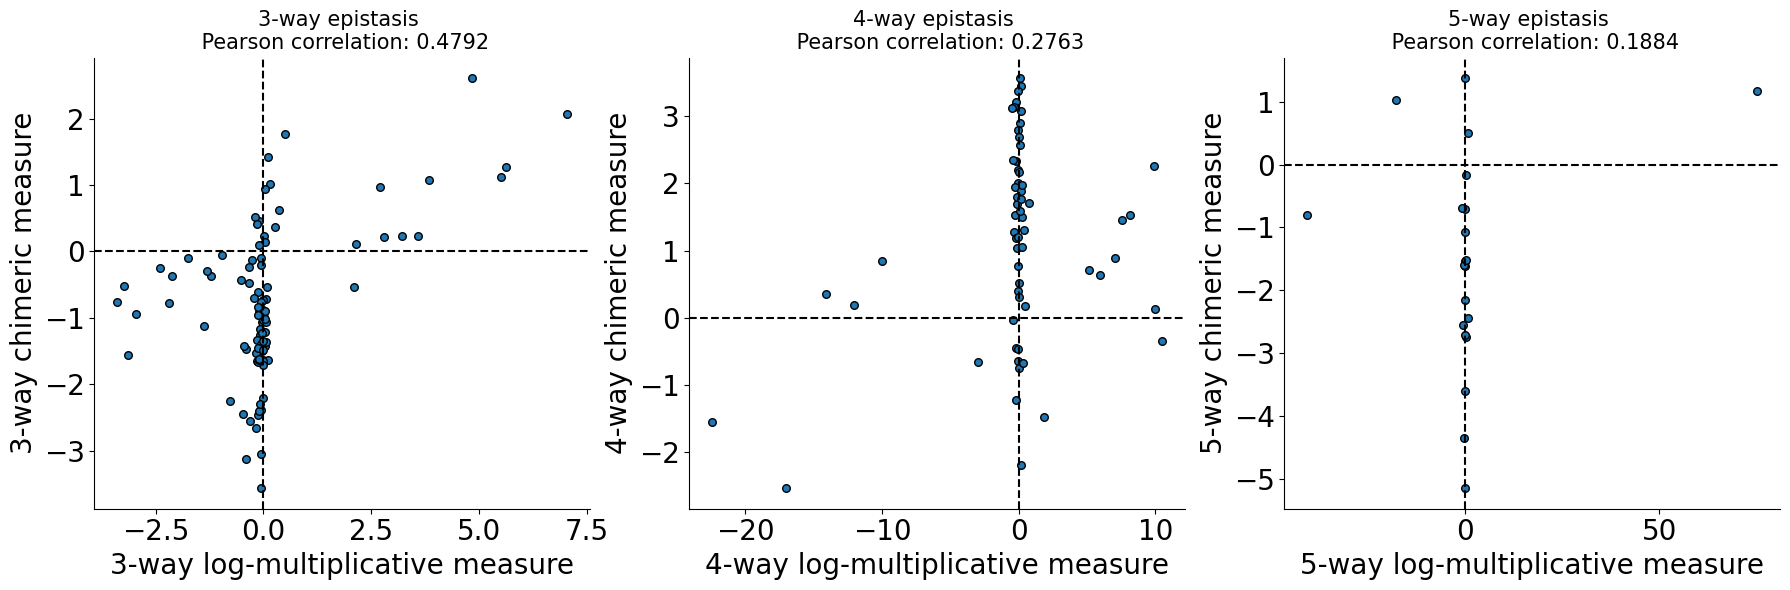

In [20]:
plot_mult_vs_chim(results_dict, 'SpCas9', order_list=[3,4,5])

## eqFP611 (Poelwijk et al)

### Pre-processing

In [21]:
file='protein_data/eqFP611_41467_2019_12130_MOESM7_ESM.xlsx'
df=pd.read_excel(file)
df=df.iloc[1:]
df

,binary,amino acid,counts,counts.1,counts.2,Unnamed: 5,brightness,brightness.1,Unnamed: 8,brightness.2
1,'0000000000000',DVLTFNSAAYNNK,5431,12,7846,NaN,0.085317,1.574628,NaN,1.574635
2,'0000000000001',DVLTFNSAAYNNR,6574,11,9047,NaN,0.075637,1.544269,NaN,1.544276
3,'0000000000010',DVLTFNSAAYNKK,10493,33,13352,NaN,0.103633,1.49045,NaN,1.490458
4,'0000000000011',DVLTFNSAAYNKR,9545,35,12513,NaN,0.106846,1.511977,NaN,1.511984
5,'0000000000100',DVLTFNSAAYDNK,3712,9,4959,NaN,0.089098,1.525153,NaN,1.52516
...,...,...,...,...,...,...,...,...,...,...
8188,'1111111111011',NAMPSAGCLRNKR,1202,536,13,NaN,0.881762,0.182807,NaN,0.881917
8189,'1111111111100',NAMPSAGCLRDNK,449,69,0,NaN,0.550323,0.239402,NaN,0.553054
8190,'1111111111101',NAMPSAGCLRDNR,1184,228,13,NaN,0.630318,0.190188,NaN,0.630917
8191,'1111111111110',NAMPSAGCLRDKK,612,156,5,NaN,0.690928,0.161936,NaN,0.691138


In [22]:
genotype_list=[list(i)[1:-1] for i in list(df['binary'])]
genotype_list=[[eval(i) for i in lis] for lis in genotype_list]

fitness_list=df['brightness.2'].to_numpy(dtype=float)
fitness_list=np.exp(fitness_list - df['brightness.2'].iloc[0])

f_vals={tuple(genotype_list[i]):fitness_list[i] for i in range(len(fitness_list))}

### Compute epistasis measures

In [23]:
key='eqFP611'
for order in [3,4,5]:
    print(f'Computing epistasis for order {order}...')
    results_dict[order][key]=mult_and_chim_epistasis(f_vals, order, log=True, fitness_threshold=0.01)

Computing epistasis for order 3...
Computing epistasis for order 4...
Computing epistasis for order 5...


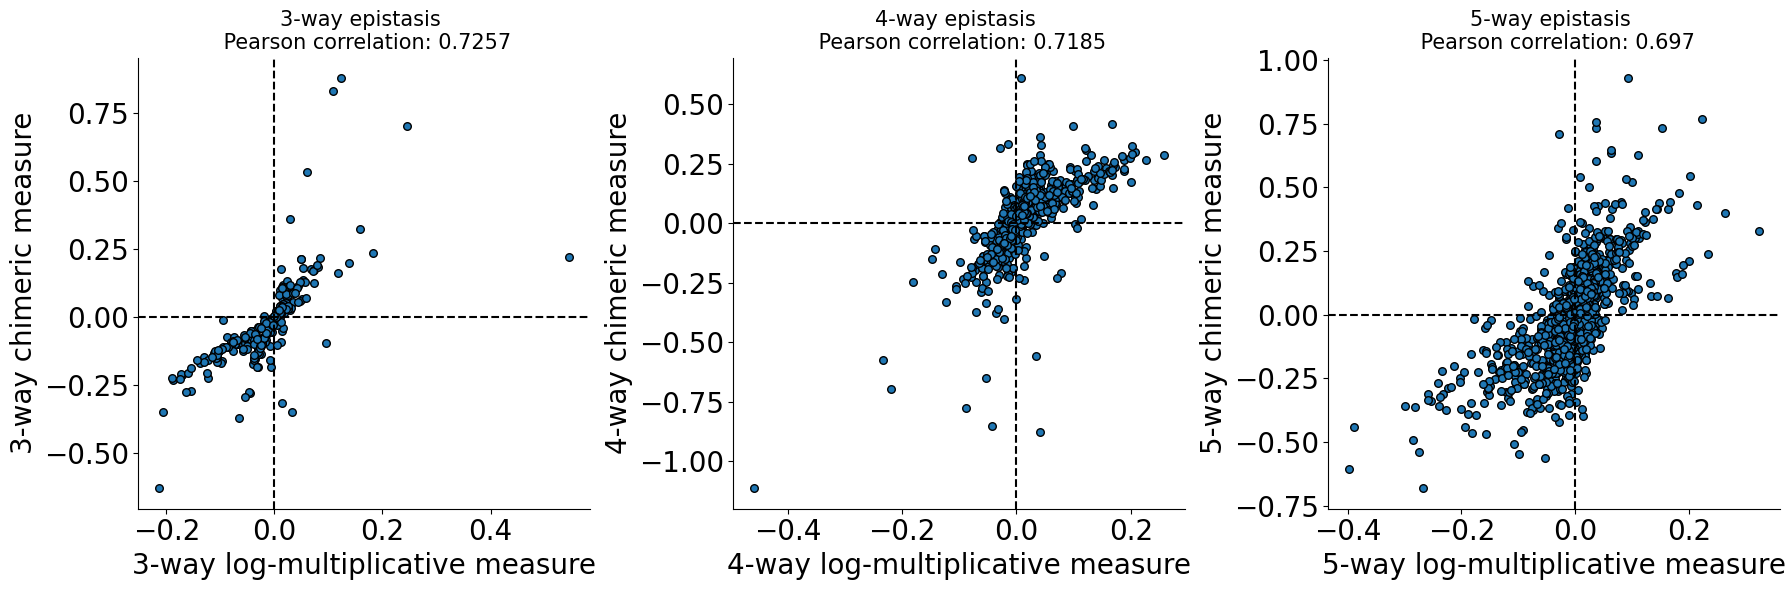

In [24]:
plot_mult_vs_chim(results_dict, 'eqFP611', order_list=[3,4,5])

## tRNA

### pre-processing

In [25]:
file='protein_data/tRNA_41586_2018_170_MOESM2_ESM.xlsx'
df=pd.read_excel(file)
df=df.iloc[4:]
new_header=df.iloc[0].tolist()
df=df[1:]
df.columns=new_header

df

,seq,num_vars,pos_vars,ntd_vars,ntd_wt,reads_IN_1,reads_IN_2,reads_OUT_11,reads_OUT_12,reads_OUT_13,reads_OUT_21,reads_OUT_22,reads_OUT_23,id,fitness,SE
5,GUUCCGUUGGCGUAAUGGUAACGCGUCUCCCUCCUAAGGAGAAGAC...,0,0,-,-,230479,222556,362419,373496,295267,293600,295486,338856,NaN,0,0.000539
6,AUUCCGUUGGCGUAAUGGUAACGCGUCUCCCUCCUAAGGAGAAGAC...,1,1,A,G,3378,3505,4947,4802,4118,4520,3702,4535,G1A,-0.02329,0.00297
7,GCUCCGUUGGCGUAAUGGUAACGCGUCUCCCUCCUAAGGAGAAGAC...,1,2,C,U,3047,3019,5213,5316,4033,4952,3886,5012,U2C,0.017488,0.002982
8,GGUCCGUUGGCGUAAUGGUAACGCGUCUCCCUCCUAAGGAGAAGAC...,1,2,G,U,6219,6012,9247,9463,7665,8288,6871,8256,U2G,-0.012523,0.00221
9,GUUCCGUUGGCGUAAUGGUAACGCGUUUCCCUCCUAAGGAGAAGAC...,1,27,U,C,4449,4246,6568,7000,5599,5617,5171,5834,C27U,-0.010564,0.002601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4176,AGUCCAUUGGCGUAAUGGUAACGCGUUUCCCUCCUAAGGAGACGAU...,10,"1,2,6,27,43,46,66,69,70,71","A,G,A,U,C,U,U,G,U,U","G,U,G,C,A,C,C,A,A,C",63,70,32,32,24,12,13,14,"G1A,U2G,G6A,C27U,A43C,C46U,C66U,A69G,A70U,C71U",-0.384036,0.0397
4177,AGUCCUUUGGCGUAAUGGUAACGCGUUUCCCUCCUAAGGAGACGAU...,10,"1,2,6,27,43,46,66,69,70,71","A,G,U,U,C,U,A,G,G,U","G,U,G,C,A,C,C,A,A,C",45,67,17,20,15,30,20,20,"G1A,U2G,G6U,C27U,A43C,C46U,C66A,A69G,A70G,C71U",-0.33701,0.038966
4178,AGUCCUUUGGCGUAAUGGUAACGCGUUUCCCUCCUAAGGAGACGAU...,10,"1,2,6,27,43,46,66,69,70,71","A,G,U,U,C,U,A,G,U,U","G,U,G,C,A,C,C,A,A,C",36,37,15,16,10,1,6,4,"G1A,U2G,G6U,C27U,A43C,C46U,C66A,A69G,A70U,C71U",-0.431428,0.062214
4179,AGUCCUUUGGCGUAAUGGUAACGCGUUUCCCUCCUAAGGAGACGAU...,10,"1,2,6,27,43,46,66,69,70,71","A,G,U,U,C,U,U,G,G,U","G,U,G,C,A,C,C,A,A,C",95,125,35,34,21,14,21,29,"G1A,U2G,G6U,C27U,A43C,C46U,C66U,A69G,A70G,C71U",-0.475136,0.03632


In [26]:
mutated_pos_all=[1,2,6,27,43,46,66,69,70,71]
possible_mutations=[[] for i in range(10)]

f_vals={tuple(0 for i in range(10)):1}
for i in range(1,df.shape[0]):
    genotype=np.zeros(10).astype(int)
    mutated_posns=[int(x) for x in df.iloc[i]['pos_vars'].split(',')] # [1,6]
    muts=df.iloc[i]['id'].split(',') # ['A1G', 'U6G']
    for m_ind, m_pos in enumerate(mutated_posns):
        m=muts[m_ind]
        if m not in possible_mutations[j]:
            possible_mutations[j].append(m)
        genotype[mutated_pos_all.index(m_pos)] = possible_mutations[j].index(m) + 1
    f_vals[tuple(genotype)] = np.exp( df.iloc[i]['fitness'] )

# print(f_vals)
pprint(dict(list(f_vals.items())[0:5])) # print first 5 entries

{(0, 0, 0, 0, 0, 0, 0, 0, 0, 0): 1,
 (0, 0, 0, 4, 0, 0, 0, 0, 0, 0): 0.9894917956093037,
 (0, 2, 0, 0, 0, 0, 0, 0, 0, 0): 1.0176416378201707,
 (0, 3, 0, 0, 0, 0, 0, 0, 0, 0): 0.9875555673931999,
 (1, 0, 0, 0, 0, 0, 0, 0, 0, 0): 0.9769790732026404}


### Compute epistasis measures

In [27]:
key='tRNA'
for order in [3,4,5]:
    print(f'Computing epistasis for order {order}...')
    results_dict[order][key]=mult_and_chim_epistasis(f_vals, order, log=True, fitness_threshold=0.01)

Computing epistasis for order 3...
Computing epistasis for order 4...
Computing epistasis for order 5...


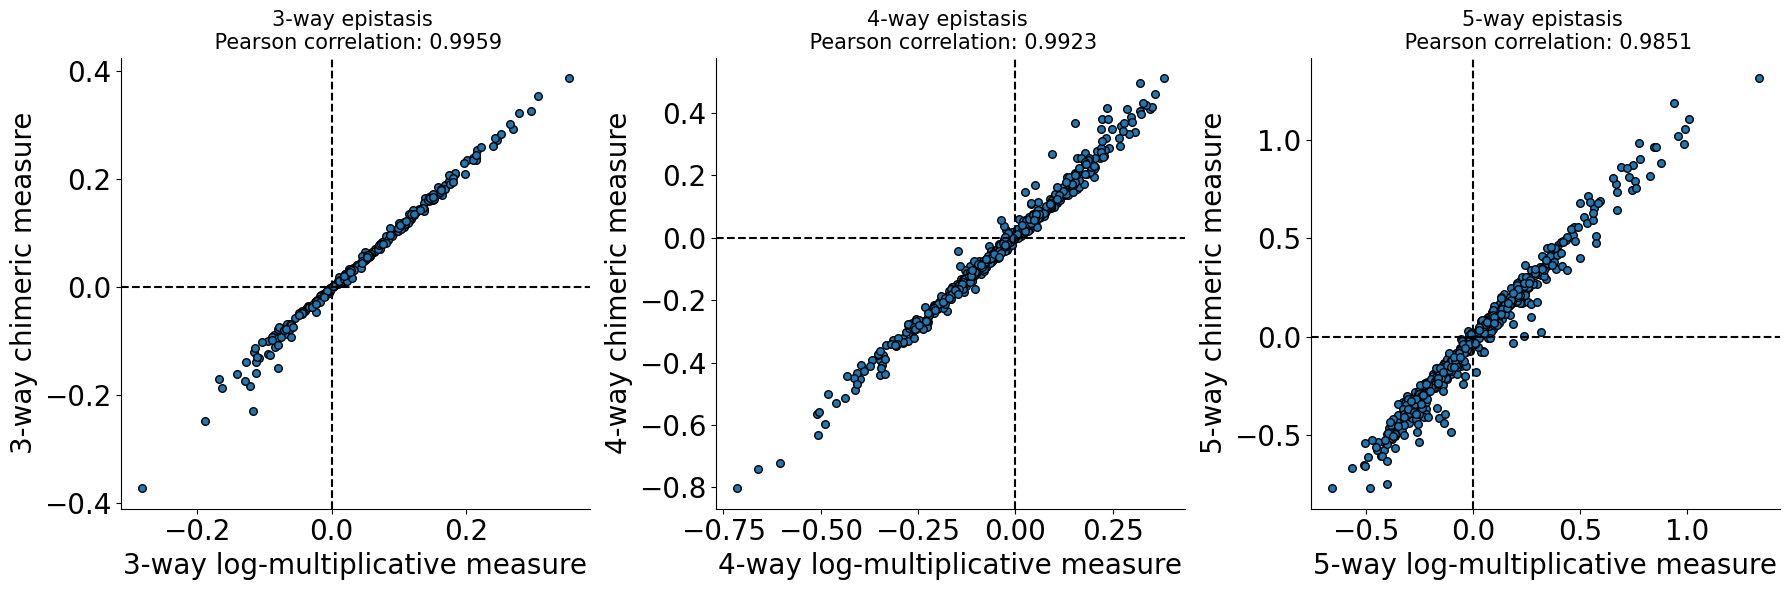

In [28]:
plot_mult_vs_chim(results_dict, 'tRNA', order_list=[3,4,5])

## avGFP

### Pre-process

In [29]:
file1='protein_data/avGFP_nucleotide_genotypes_to_brightness.tsv'

df=pd.read_csv(file1,sep='\t')
df # we will use nMutations, for nucleotide mutations

,nMutations,aaMutations,uniqueBarcodes,medianBrightness,std
0,NaN,NaN,2444,3.718386,0.111561
1,SA191C,NaN,2,3.622869,0.145991
2,SA191G,NaN,25,3.722241,0.112935
3,SA191G:SC263T,NaN,1,3.697823,NaN
4,SA191G:SC488T,NaN,1,3.804003,NaN
...,...,...,...,...,...
58412,ST270A:SA310G:SA507T,SY90N:SN103S:SI169F,1,1.552090,NaN
58413,ST270A:SA526T:ST616A:SA684G:SA693G,SY90N:SQ175L:SL205Q:ST228A:SM231V,1,1.301030,NaN
58414,ST270C:SA271G:ST451A:SA589G,SY90R:SI150N:SN196S,1,1.301030,NaN
58415,SC176T:ST270C:SA271G:ST496C:ST703C,SY90R:SI165T:SL234P,1,1.301517,NaN


In [30]:
# first, get list of all mutated loci
mut_key='nMutations'
all_muts_list=list(np.unique(list(chain(*[x.split(':') for x in df[mut_key][1:]]))))

def extract_number(s):
    match = re.search(r'\d+', s)
    if match:
        return int(match.group())
    return None

all_locus_list=list(np.unique([extract_number(s) for s in all_muts_list]))
L=len(all_locus_list)
possible_mutations_at_loci=[[] for l in range(L)]

In [31]:
# then create f_vals dict
f_vals={tuple(0 for i in range(L)):1}
for i in range(1,df.shape[0]):
    genotype=np.zeros(L).astype(int)
    muts=df.iloc[i][mut_key].split(':') 
    muts_loci=[extract_number(s) for s in muts]
    for j,locus in enumerate(muts_loci):
        mut=muts[j]
        locus_ind=all_locus_list.index(locus)
        if mut not in possible_mutations_at_loci[locus_ind]:
            possible_mutations_at_loci[locus_ind].append(mut)
        genotype[locus_ind]=possible_mutations_at_loci[locus_ind].index(mut) + 1
    # genotype[muts]=1
    f_vals[tuple(genotype)] = np.exp( df.iloc[i]['medianBrightness'] - df.iloc[0]['medianBrightness'] )

### Compute epistasis

In [32]:
key='avGFP'
for order in [3,4,5]:
    print(f'Computing epistasis for order {order}...')
    results_dict[order][key]=mult_and_chim_epistasis(f_vals, order, log=True, fitness_threshold=0.01)

Computing epistasis for order 3...
Computing epistasis for order 4...
Computing epistasis for order 5...


/n/fs/ragr-data/users/uchitra/miniconda3/envs/gaston-dev/lib/python3.11/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/n/fs/ragr-data/users/uchitra/miniconda3/envs/gaston-dev/lib/python3.11/site-packages/numpy/core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/n/fs/ragr-data/users/uchitra/miniconda3/envs/gaston-dev/lib/python3.11/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/n/fs/ragr-data/users/uchitra/miniconda3/envs/gaston-dev/lib/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/n/fs/ragr-data/users/uchitra/miniconda3/envs/gaston-dev/lib/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


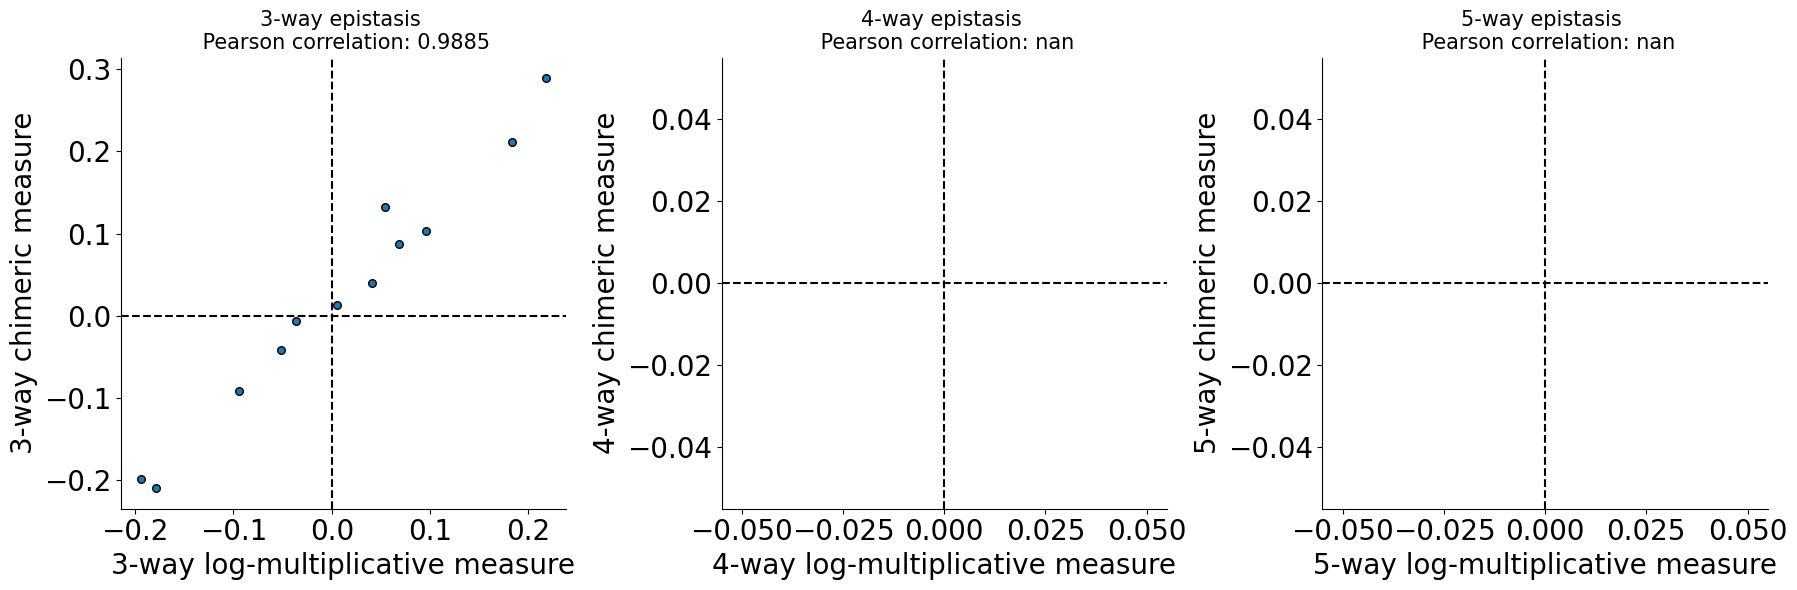

In [33]:
plot_mult_vs_chim(results_dict, 'avGFP', order_list=[3,4,5])

## ppluGFP, cgreGFP, amacGFP

In [34]:
file='protein_data/amacGFP_cgreGFP_ppluGFP2__final_nucleotide_genotypes_to_brightness.csv'

df=pd.read_csv(file)
proteins=['amacGFP', 'cgreGFP', 'ppluGFP']
f_vals_list=[{} for i in range(len(proteins))]
df

,nt_genotype,aa_genotype_pseudo,gene,total_cell_count,n_replicates,replicates_stdev_weighted,replicates_mean_brightness,index_of_dispersion,aa_genotype_native
0,A30T:A610T,I13F:Q210L,amacGFP,124.57,9.0,1456.115866,7606.846128,278.732260,I10F:Q203L
1,A153G,K54E,amacGFP,834.16,66.0,1117.403862,8904.464928,140.220822,K51E
2,A235T:C341T:T589C,K81M:I203T,amacGFP,50.96,4.0,1220.778920,8362.848434,178.204972,K78M:I196T
3,G33T:C518T,V14L,amacGFP,208.03,23.0,1189.869468,9418.089279,150.326601,V11L
4,T31C:T432C,I13T:F148L,amacGFP,37.42,7.0,216.483813,543.514540,86.226288,I10T:F144L
...,...,...,...,...,...,...,...,...,...
127972,G41A:G67A:A614G,G33D,ppluGFP,28.89,5.0,3378.354749,11712.048970,974.490530,G22D
127973,G53A:G321T:T513A:A609G,G120C:S186T:T223A,ppluGFP,23.09,3.0,1096.097929,8691.540405,138.229889,G107C:S171T:T203A
127974,C82T:A347G:A391T:A410T:C491T:T494C:A609C:A614G,T38I:K143M:T223P,ppluGFP,26.76,3.0,397.686983,11424.717005,13.843226,T27I:K130M:T203P
127975,T220A:T314A:A531G,F86Y:Y117*:S192G,ppluGFP,24.45,3.0,663.476042,3195.096499,137.773760,F73Y:Y104*:S177G


In [35]:
df2=df[df['gene']=='ppluGFP']
df2

,nt_genotype,aa_genotype_pseudo,gene,total_cell_count,n_replicates,replicates_stdev_weighted,replicates_mean_brightness,index_of_dispersion,aa_genotype_native
80932,A665G,wt,ppluGFP,13569.94,584.0,2104.496237,17010.434843,260.363974,wt
80933,wt,wt,ppluGFP,1802250.59,80004.0,2429.580048,16747.722678,352.457425,wt
80934,C39A:A211G:A511G,L24M:E81G:D185G,ppluGFP,165.75,11.0,1645.061978,13390.148350,202.105969,L13M:E70G:D170G
80935,G462C,A169P,ppluGFP,131.36,11.0,1242.638028,11497.325507,134.305084,A154P
80936,A299G:G350T:A374T,wt,ppluGFP,222.95,9.0,938.690754,16265.580145,54.172081,wt
...,...,...,...,...,...,...,...,...,...
127972,G41A:G67A:A614G,G33D,ppluGFP,28.89,5.0,3378.354749,11712.048970,974.490530,G22D
127973,G53A:G321T:T513A:A609G,G120C:S186T:T223A,ppluGFP,23.09,3.0,1096.097929,8691.540405,138.229889,G107C:S171T:T203A
127974,C82T:A347G:A391T:A410T:C491T:T494C:A609C:A614G,T38I:K143M:T223P,ppluGFP,26.76,3.0,397.686983,11424.717005,13.843226,T27I:K130M:T203P
127975,T220A:T314A:A531G,F86Y:Y117*:S192G,ppluGFP,24.45,3.0,663.476042,3195.096499,137.773760,F73Y:Y104*:S177G


In [36]:
mut_key='aa_genotype_native'

for _,protein in enumerate(proteins):
    print(f'protein: {protein}')
    df2=df[df['gene']==protein]
    
    # first, get list of all mutated loci
    all_muts_list=list(np.unique(list(chain(*[x.split(':') for x in df2[mut_key] if x != 'wt'])))) # use nucleotide mutations since not enough AA mutations to compute epistasis
    
    def extract_number(s):
        match = re.search(r'\d+', s)
        if match:
            return int(match.group())
        return None
    
    all_locus_list=list(np.unique([extract_number(s) for s in all_muts_list]))
    L=len(all_locus_list)
    possible_mutations_at_loci=[[] for l in range(L)]

    # then create f_vals dict
    df2_reset=df2.reset_index()
    wt_index=df2_reset.index[df2_reset[mut_key]=='wt'][0] # where in dict is wildtype
    
    f_vals={tuple(0 for i in range(L)):1}
    for i in range(df2.shape[0]):
        genotype=np.zeros(L).astype(int)
        if df2.iloc[i][mut_key]=='wt':
            continue
        muts=df2.iloc[i][mut_key].split(':') 
        muts_loci=[extract_number(s) for s in muts]
        for j,locus in enumerate(muts_loci):
            mut=muts[j]
            locus_ind=all_locus_list.index(locus)
            if mut not in possible_mutations_at_loci[locus_ind]:
                possible_mutations_at_loci[locus_ind].append(mut)
            genotype[locus_ind]=possible_mutations_at_loci[locus_ind].index(mut) + 1
    
        f_vals[tuple(genotype)] = df2.iloc[i]['replicates_mean_brightness'] / df2.iloc[wt_index]['replicates_mean_brightness']
    f_vals_list[_]=f_vals

protein: amacGFP
protein: cgreGFP
protein: ppluGFP


### Compute epistasis measures

In [37]:
for _,protein in enumerate(proteins):
    print(f'protein: {protein}')
    key=protein
    for order in [3,4,5]:
        print(f'Computing epistasis for order {order}...')
        results_dict[order][key]=mult_and_chim_epistasis(f_vals_list[_], order, log=True, fitness_threshold=0.01)

protein: amacGFP
Computing epistasis for order 3...
Computing epistasis for order 4...
Computing epistasis for order 5...
protein: cgreGFP
Computing epistasis for order 3...
Computing epistasis for order 4...
Computing epistasis for order 5...
protein: ppluGFP
Computing epistasis for order 3...
Computing epistasis for order 4...
Computing epistasis for order 5...


/n/fs/ragr-data/users/uchitra/miniconda3/envs/gaston-dev/lib/python3.11/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/n/fs/ragr-data/users/uchitra/miniconda3/envs/gaston-dev/lib/python3.11/site-packages/numpy/core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/n/fs/ragr-data/users/uchitra/miniconda3/envs/gaston-dev/lib/python3.11/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/n/fs/ragr-data/users/uchitra/miniconda3/envs/gaston-dev/lib/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/n/fs/ragr-data/users/uchitra/miniconda3/envs/gaston-dev/lib/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


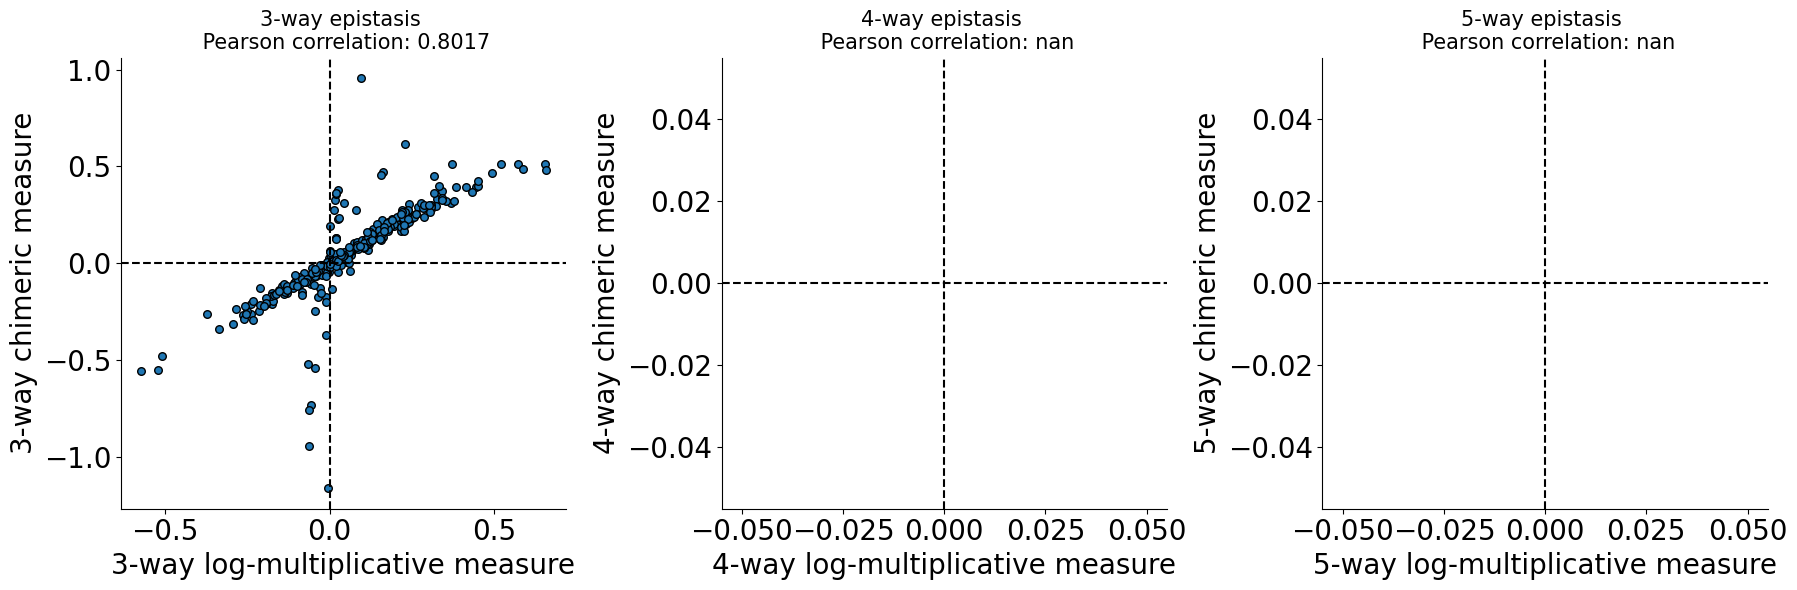

In [38]:
plot_mult_vs_chim(results_dict, 'amacGFP', order_list=[3,4,5])

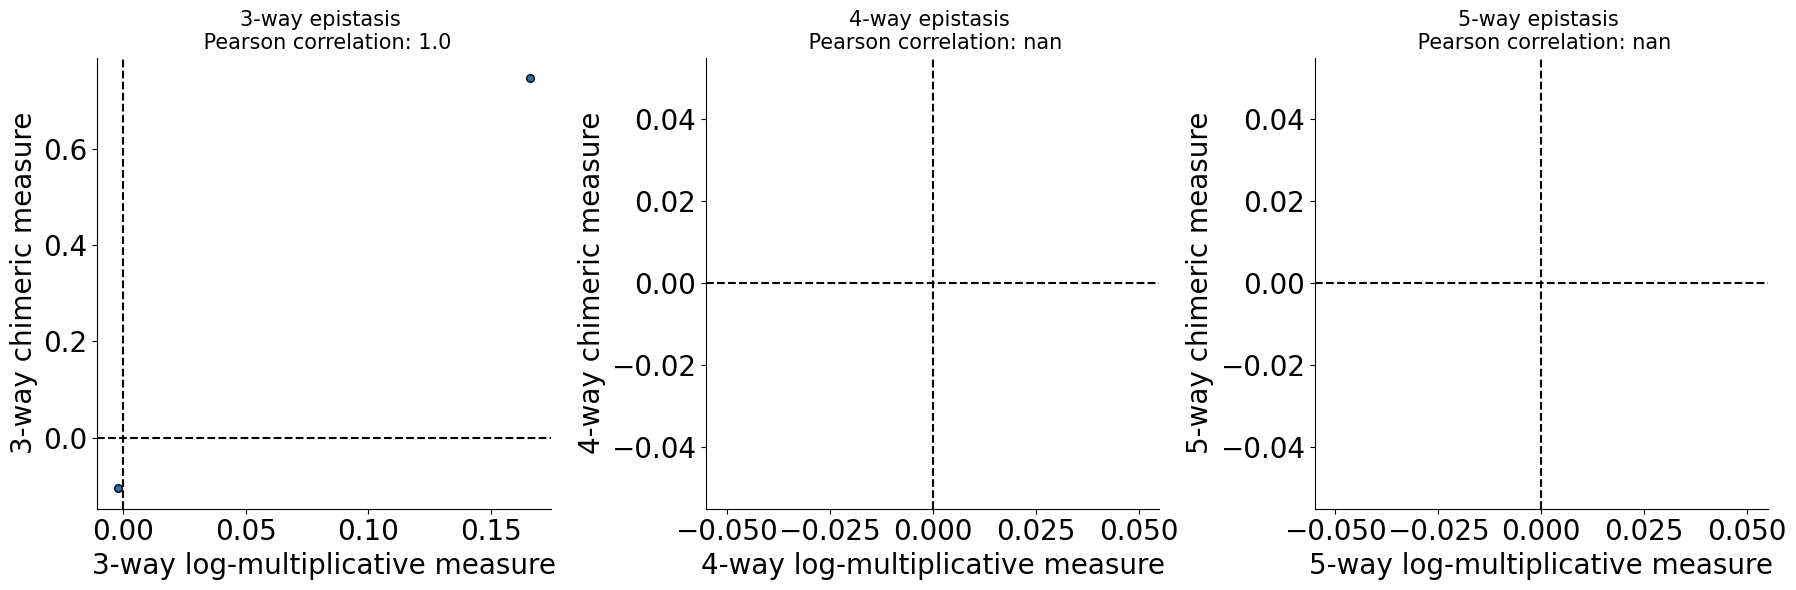

In [39]:
plot_mult_vs_chim(results_dict, 'cgreGFP', order_list=[3,4,5])

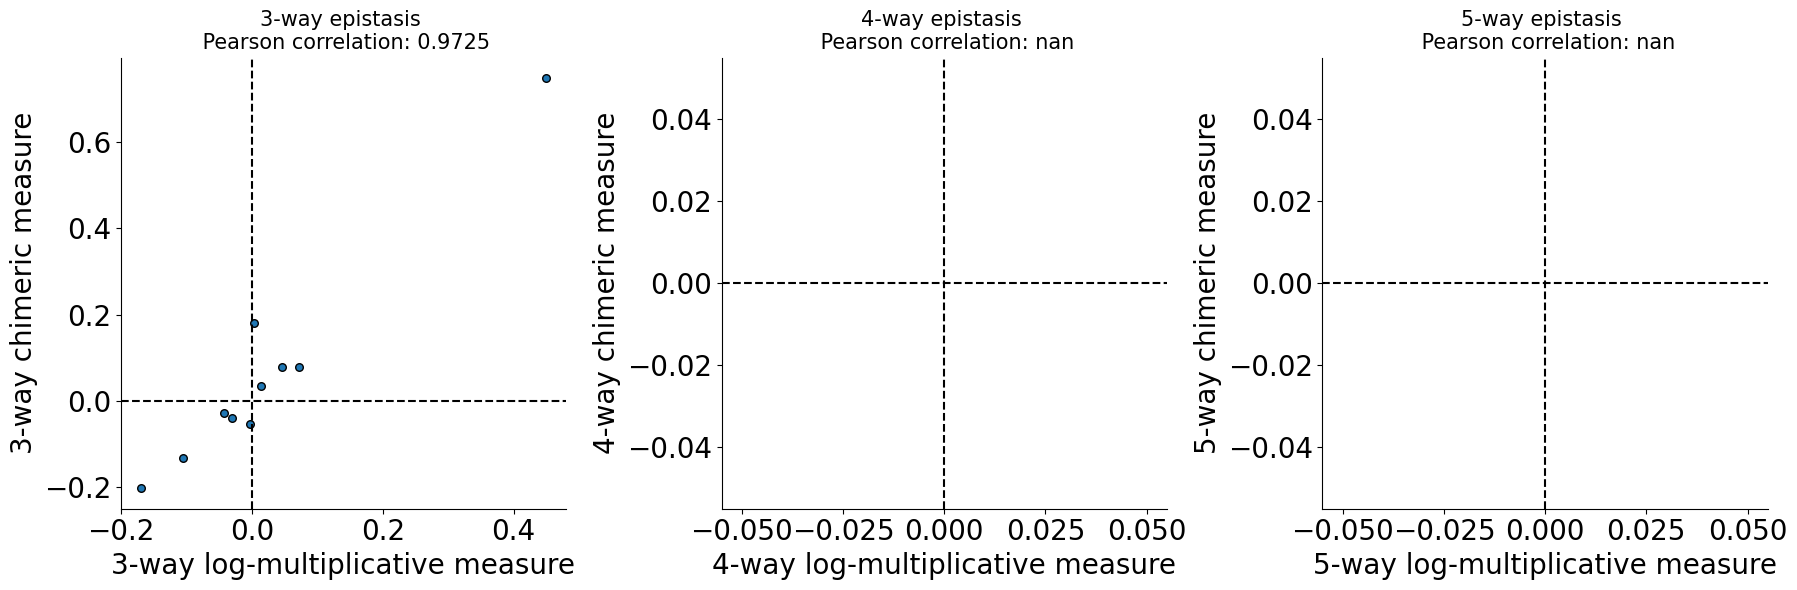

In [40]:
plot_mult_vs_chim(results_dict, 'ppluGFP', order_list=[3,4,5])

## CreiLOV

### Pre-processing

In [41]:
file='protein_data/CreiLOV_sb2c00662_si_002.xlsx'
df=pd.read_excel(file)
df

,Unnamed: 0,Rep1,Rep2,Rep3,mean,Rep1_log,Rep2_log,Rep3_log,mean_log
0,wt,11436.152410,11590.593910,8621.598935,10549.448420,4.058280,4.064106,3.935588,4.023230
1,p.Thr7Ser,15190.430710,15177.975890,10986.791320,13785.065970,4.181570,4.181214,4.040871,4.139409
2,p.Arg5Asp,11742.953560,14620.048770,12136.214420,12833.072250,4.069777,4.164949,4.084083,4.108331
3,p.Thr7His,12282.682640,13610.056920,12035.501970,12642.747180,4.089293,4.133860,4.080464,4.101841
4,p.Leu4Asn,12075.633750,10924.853670,8659.384022,10553.290480,4.081910,4.038416,3.937487,4.023388
...,...,...,...,...,...,...,...,...,...
165423,"p.Gly3Glu, p.Leu4Asn, p.Arg5Asp, p.Thr7Ser, p....",2824.791455,2871.556273,1734.183279,2476.843669,3.450986,3.458117,3.239095,3.393899
165424,"p.Gly3Glu, p.Leu4Asn, p.Arg5Asp, p.Thr7His, p....",2209.536104,1530.387535,2579.865560,2106.596400,3.344301,3.184801,3.411597,3.323581
165425,"p.Gly3Glu, p.Leu4Asn, p.Arg5Asp, p.Thr7His, p....",1669.378171,2256.697304,2042.302194,1989.459223,3.222555,3.353473,3.310120,3.298735
165426,"p.Gly3Glu, p.Leu4Asn, p.Arg5Asp, p.Thr7His, p....",1932.941789,1633.037699,1767.044805,1777.674765,3.286219,3.212996,3.247248,3.249852


In [42]:
# first, get list of all mutated loci
mut_key='Unnamed: 0'
# all_mut_list=list(np.unique(list(chain(*[x[2:] for x in df[mut_key][1:]]))))
all_mut_list=list(np.unique(list(chain(*[x.split(', ') for x in df[mut_key][1:]]))))

def extract_number(s):
    match = re.search(r'\d+', s)
    if match:
        return int(match.group())
    return None

all_locus_list=list(np.unique([extract_number(s) for s in all_mut_list]))
L=len(all_locus_list)
possible_mutations_at_loci=[[] for l in range(L)]

In [43]:
# then create f_vals dict
f_vals={tuple(0 for i in range(L)):1}
for i in range(1,df.shape[0]):
    genotype=np.zeros(L).astype(int)
    muts=df.iloc[i][mut_key].split(', ') 
    muts_loci=[extract_number(s) for s in muts]
    for j,locus in enumerate(muts_loci):
        mut=muts[j]
        locus_ind=all_locus_list.index(locus)
        if mut not in possible_mutations_at_loci[locus_ind]:
            possible_mutations_at_loci[locus_ind].append(mut)
        genotype[locus_ind]=possible_mutations_at_loci[locus_ind].index(mut) + 1
    # genotype[muts]=1
    f_vals[tuple(genotype)] = np.exp( df.iloc[i]['mean_log'] - df.iloc[0]['mean_log'] )

500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500
23000
23500
24000
24500
25000
25500
26000
26500
27000
27500
28000
28500
29000
29500
30000
30500
31000
31500
32000
32500
33000
33500
34000
34500
35000
35500
36000
36500
37000
37500
38000
38500
39000
39500
40000
40500
41000
41500
42000
42500
43000
43500
44000
44500
45000
45500
46000
46500
47000
47500
48000
48500
49000
49500
50000
50500
51000
51500
52000
52500
53000
53500
54000
54500
55000
55500
56000
56500
57000
57500
58000
58500
59000
59500
60000
60500
61000
61500
62000
62500
63000
63500
64000
64500
65000
65500
66000
66500
67000
67500
68000
68500
69000
69500
70000
70500
71000
71500
72000
72500
73000
73500
74000
74500
75000
75500
76000
76500
77000
77500
78000
78500
79000
79500
80000
80500
81000
81500
82000
82500
83000
83500
84000
84500
85000


### Compute epistasis

In [44]:
key='CreiLOV'
for order in [3,4,5]:
    print(f'Computing epistasis for order {order}...')
    results_dict[order][key]=mult_and_chim_epistasis(f_vals, order, log=True, fitness_threshold=0.01)

Computing epistasis for order 3...
Computing epistasis for order 4...
Computing epistasis for order 5...


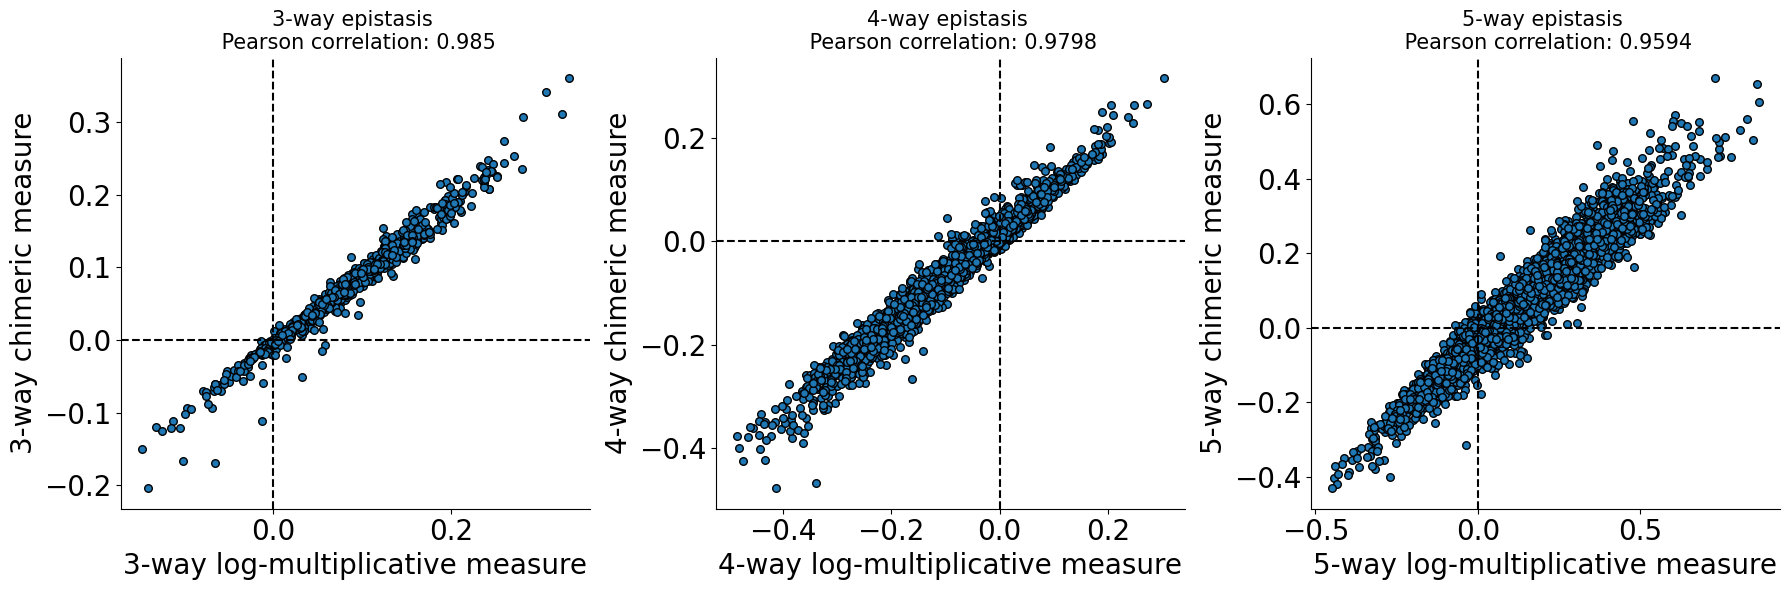

In [45]:
plot_mult_vs_chim(results_dict, 'CreiLOV', order_list=[3,4,5])

# Plot standard deviation vs correlation, sign disagreement fraction

In [46]:
stdev_dict,corr_dict,sign_disagg_dict=compute_std_vs_corr_sdf(results_dict,order_list=[3,4,5])

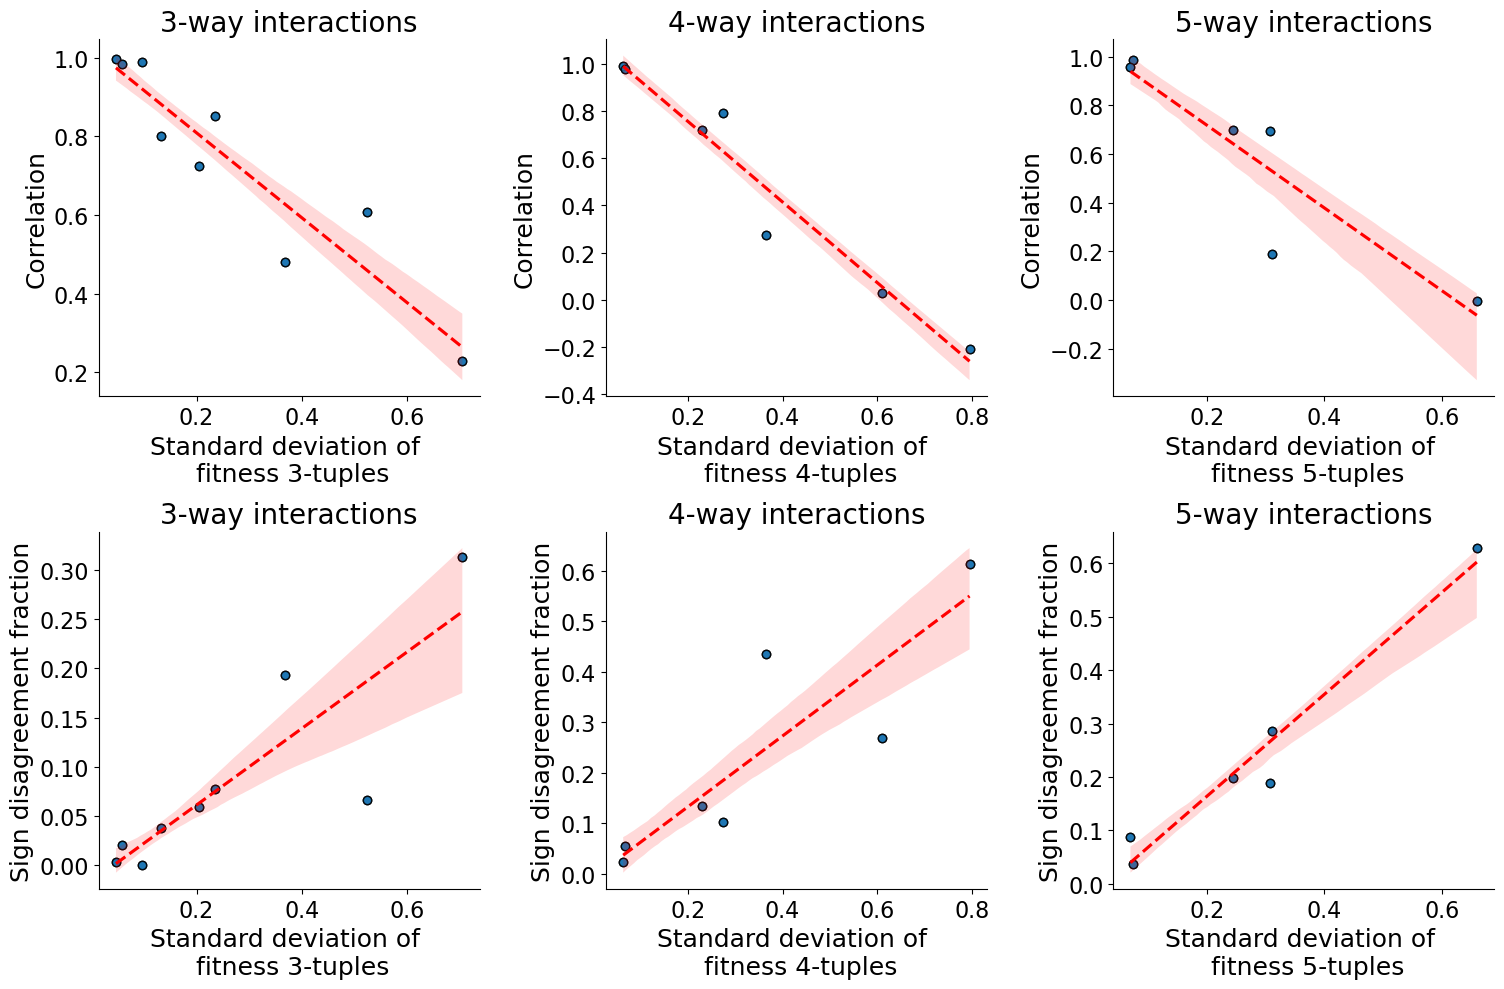

In [47]:
plot_stdev_vs_corr_sdf(stdev_dict,corr_dict,sign_disagg_dict)